# COMP 562 Final Project Analysis

#### Authors:
Cooper Lee, James Tuong, Nathaniel Turner, Alan Vasquez

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
# %pip install mlxtend --quiet
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics, preprocessing
import warnings
warnings.filterwarnings('ignore')
# import sklearn #need to figure out what parts of sklearn to import that we'll use

Loading in the dataset and splitting into test and training set (may want to do each time for the different methods)

In [2]:
dpath = "data/heart.csv"
feature_names = ["age","sex","cp","trtbps","chol","fbs","restecg","thalachh",
                                 "exng","oldpeak","slp","caa","thall", "output"]
english_feature_names = ["age", "sex", "chest pain", "resting blood pressure", "cholesterol", "fasting blood sugar", 
                         "resting electrocardiographic results", "maximum heart rate achieved", 
                        "exercise induced angina", "old peak", "slope", "number of major arteries",
                        "thall rate", "output"]
cat_cols = ["sex","cp","fbs","restecg", "exng","slp","caa","thall"]
con_cols = ["age", "chol","trtbps","thalachh","oldpeak"]

data = np.genfromtxt(dpath, delimiter=",", skip_header=1, names=feature_names)

heart_data = np.array([data[i] for i in feature_names[:-1]]).T
heart_attack_odds = data["output"]

In [3]:
df_tree = pd.read_csv("data/heart.csv")
df_tree = df_tree.apply(LabelEncoder().fit_transform)
X = df_tree.drop(['output'], axis=1)
y = df_tree['output'].values

y = y.reshape(-1, 1)
# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (212, 13)
The shape of X_test is        (91, 13)
The shape of y_train is       (212, 1)
The shape of y_test is        (91, 1)


In [4]:
df_nontree = pd.read_csv("data/heart.csv")
df_nontree = pd.get_dummies(df_nontree, columns = cat_cols, drop_first = True)
X = df_nontree.drop(['output'], axis=1)
y = df_nontree['output'].values

y = y.reshape(-1, 1)

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])

#nontree = 'nt'
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print("The shape of X_train is      ", X_train_nt.shape)
print("The shape of X_test is       ",X_test_nt.shape)
print("The shape of y_train is      ",y_train_nt.shape)
print("The shape of y_test is       ",y_test_nt.shape)

The shape of X_train is       (212, 22)
The shape of X_test is        (91, 22)
The shape of y_train is       (212, 1)
The shape of y_test is        (91, 1)


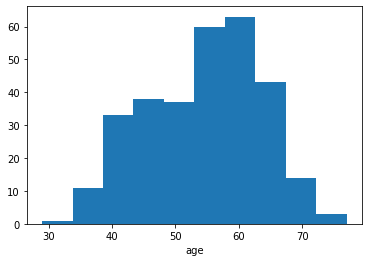

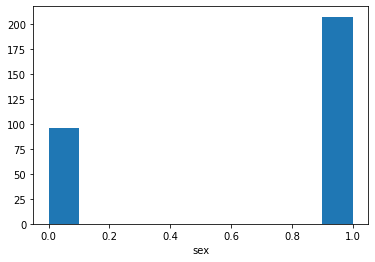

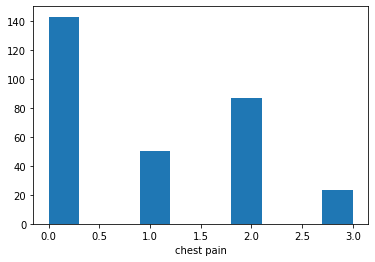

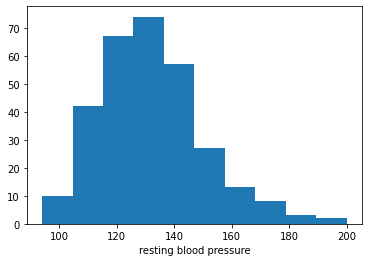

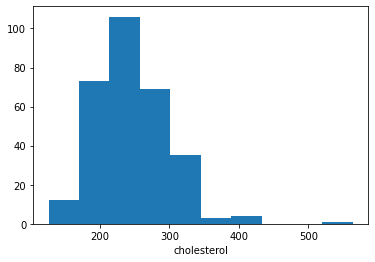

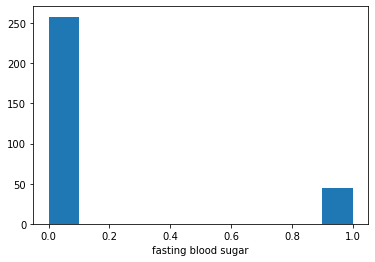

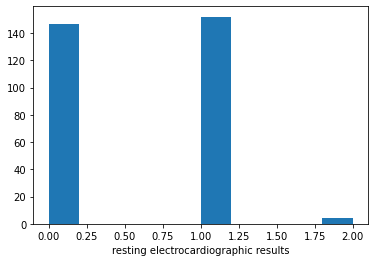

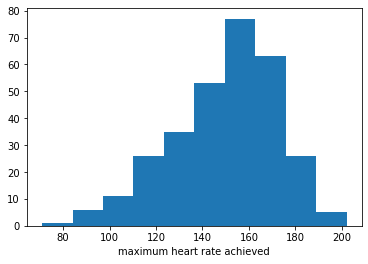

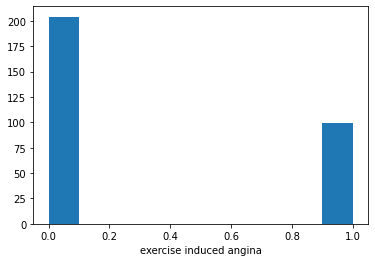

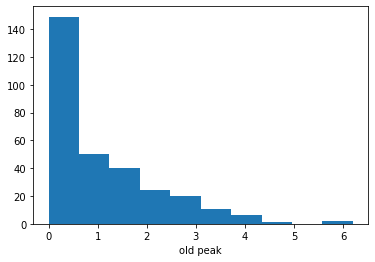

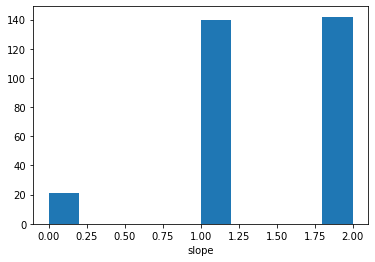

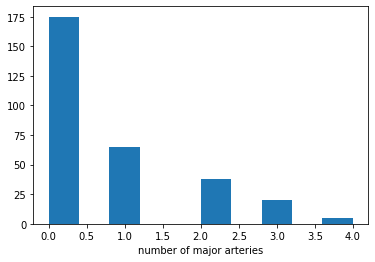

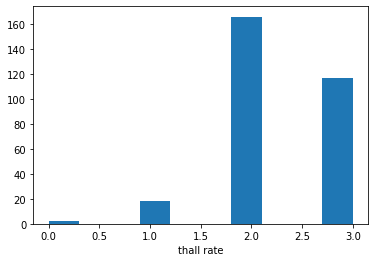

In [5]:
for i in range(len(feature_names)-1):
    plt.figure()
    plt.hist(heart_data[:,i])
    plt.xlabel(english_feature_names[i])

## Method 1: Binary Tree

In [6]:
# Create Accuracy log and kfold splits
k=5
acc_score = []
kf = StratifiedKFold(n_splits=k)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train,y_train)):
    X_fld_train, X_fld_val = X_train.iloc[trn_,:-1], X_train.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train[trn_], y_train[val_]
    
    # Create Decision Tree classifer object
    clf_binary_tree = DecisionTreeClassifier(random_state=4, max_depth=4)

    # Train Decision Tree Classifer
    clf_binary_tree = clf_binary_tree.fit(X_fld_train,y_fld_train)

    #Predict the response for test dataset
    y_pred_binary_tree = clf_binary_tree.predict(X_fld_val)
    
    #Log accuracy
    acc = metrics.accuracy_score(y_fld_val, y_pred_binary_tree)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7674418604651163, 0.627906976744186, 0.7857142857142857, 0.6904761904761905, 0.8571428571428571]
Avg accuracy : 0.7457364341085271


Accuracy: 0.791


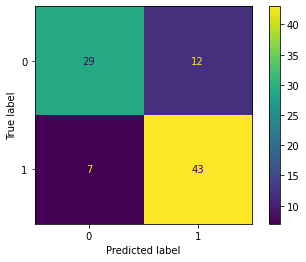

In [7]:
# Whole dataset
clf_binary_tree = DecisionTreeClassifier(random_state=4, max_depth=4)

# Train Decision Tree Classifer
clf_binary_tree = clf_binary_tree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_binary_tree = clf_binary_tree.predict(X_test)

print('Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_binary_tree))
cm = confusion_matrix(y_test, y_pred_binary_tree, labels=clf_binary_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_binary_tree.classes_)
disp.plot()

## Method 2: Random Forest

In [8]:
#Create Accuracy log and kfold splits
k=5
acc_score = []
kf = StratifiedKFold(n_splits=k)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train,y_train)):
    X_fld_train, X_fld_val = X_train.iloc[trn_,:-1], X_train.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train[trn_], y_train[val_]
    
    # Create Random Forest Classifer object
    forest = RandomForestClassifier(criterion='gini',
                                 max_depth =8,
                                 n_estimators=10,
                                 random_state=4,
                                 n_jobs=2)

    # Train Random Forest Classifer
    forest.fit(X_fld_train, y_fld_train.ravel())

    #Predict the response for test dataset
    y_pred = forest.predict(X_fld_val)
    
    #Log accuracy
    acc = accuracy_score(y_fld_val, y_pred)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7441860465116279, 0.7441860465116279, 0.8809523809523809, 0.8333333333333334, 0.8571428571428571]
Avg accuracy : 0.8119601328903654


In [9]:
forest = RandomForestClassifier(criterion='gini',
                                 max_depth = 8,
                                 n_estimators=10,
                                 random_state=4,
                                 n_jobs=2)
forest.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=8, n_estimators=10, n_jobs=2, random_state=4)

Accuracy: 0.857


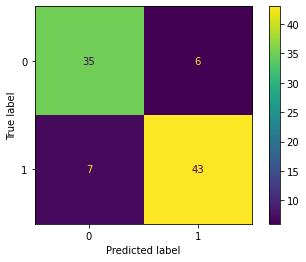

In [10]:
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()

## Method 3: Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

#Create Accuracy log and kfold splits
k=5
acc_LogReg = []
kf = StratifiedKFold(n_splits=k)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train_nt,y_train_nt)):
    X_fld_train, X_fld_val = X_train_nt.iloc[trn_,:-1], X_train_nt.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train_nt[trn_], y_train_nt[val_]

    # Create and Train  Logistic Regression Classifer
    clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_fld_train, y_fld_train.ravel())

    #Predict the response for test dataset
    clf.predict(X_fld_val)
    clf.predict_proba(X_fld_val)
    
    #Log accuracy
    acc = clf.score(X_fld_val, y_fld_val)
    acc_LogReg.append(acc)

avg_acc_score_LogReg = sum(acc_LogReg)/k
print('accuracy of each fold - {}'.format(acc_LogReg))
print('Avg accuracy of Logistic Regression: {}'.format(avg_acc_score_LogReg))

accuracy of each fold - [0.7209302325581395, 0.813953488372093, 0.9285714285714286, 0.8333333333333334, 0.8571428571428571]
Avg accuracy of Logistic Regression: 0.8307862679955704


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_nt, y_train_nt)
y_pred = clf.predict(X_test_nt)

clf.predict_proba(X_test_nt)


clf.score(X_test_nt, y_test_nt)

0.8681318681318682

Accuracy: 0.868


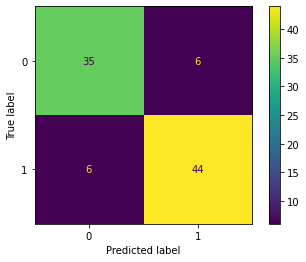

In [13]:
print('Accuracy: %.3f' % accuracy_score(y_test_nt, y_pred))
cm = confusion_matrix(y_test_nt, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

## Method 4: SVM

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

acc_svm=[]
kf=StratifiedKFold(n_splits=5)

# Loop through folds
for fold, (trn_, val_ ) in enumerate(kf.split(X_train_nt,y_train_nt)):
    X_fld_train, X_fld_val = X_train_nt.iloc[trn_,:-1], X_train_nt.iloc[val_,:-1]
    y_fld_train, y_fld_val= y_train_nt[trn_], y_train_nt[val_]
    
    ro_scaler=MinMaxScaler()
    X_fld_train=ro_scaler.fit_transform(X_fld_train)
    X_fld_val=ro_scaler.transform(X_fld_val)
        
    clf=SVC(kernel="rbf")
    clf.fit(X_fld_train, y_fld_train.ravel())
    y_pred=clf.predict(X_fld_val)
    acc=roc_auc_score(y_fld_val,y_pred)
    acc_svm.append(acc)

avg_acc_score_svm = sum(acc_svm)/k
print('accuracy of each fold - {}'.format(acc_svm))
print('Avg accuracy of Linear SVM: {}'.format(avg_acc_score_svm))

#Train on entire training dataset
ro_scaler=MinMaxScaler()
X_train_nt=ro_scaler.fit_transform(X_train_nt)
X_test_nt=ro_scaler.transform(X_test_nt)

clf=SVC(kernel="linear")
clf.fit(X_train_nt, y_train_nt.ravel())
y_pred=clf.predict(X_test_nt)
print(roc_auc_score(y_test_nt,y_pred))

accuracy of each fold - [0.8032608695652175, 0.7945652173913043, 0.9038901601830663, 0.8295194508009154, 0.8295194508009154]
Avg accuracy of Linear SVM: 0.8321510297482837
0.8080487804878048


Accuracy: 0.813


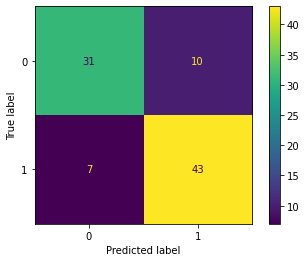

In [15]:
print('Accuracy: %.3f' % accuracy_score(y_test_nt, y_pred))
cm = confusion_matrix(y_test_nt, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()